In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
df.shape

(366, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [9]:
df.isna().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [10]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [11]:
df.rename(str.strip, axis='columns', inplace=True)
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
for col in df.columns:
  if df[col].isna().sum()>0:
    df[col].fillna(df[col].mean(), inplace=True)

df.isna().sum().sum()

np.int64(0)

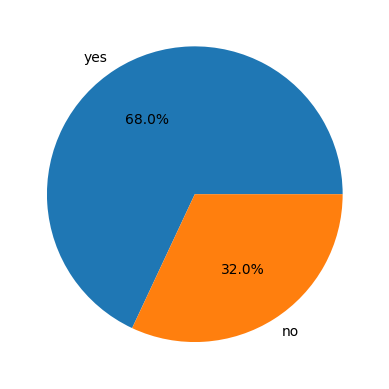

In [15]:
plt.pie(df['rainfall'].value_counts(), labels=df['rainfall'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [16]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [17]:
features=list(df.select_dtypes(include=np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


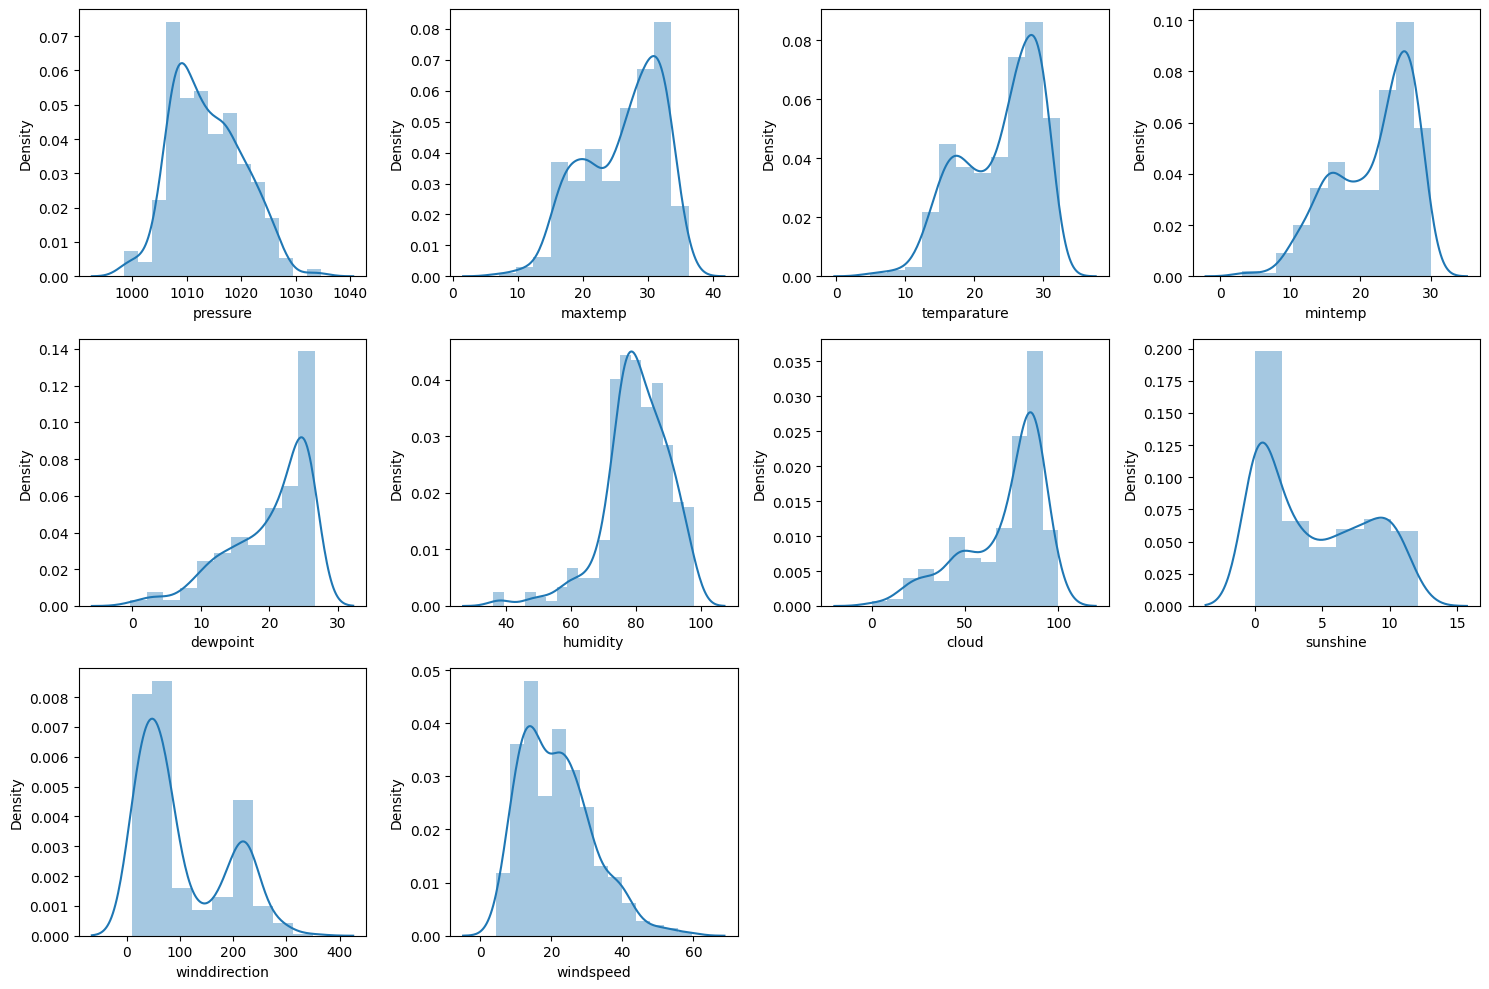

In [30]:
plt.figure(figsize=(15,10))
for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

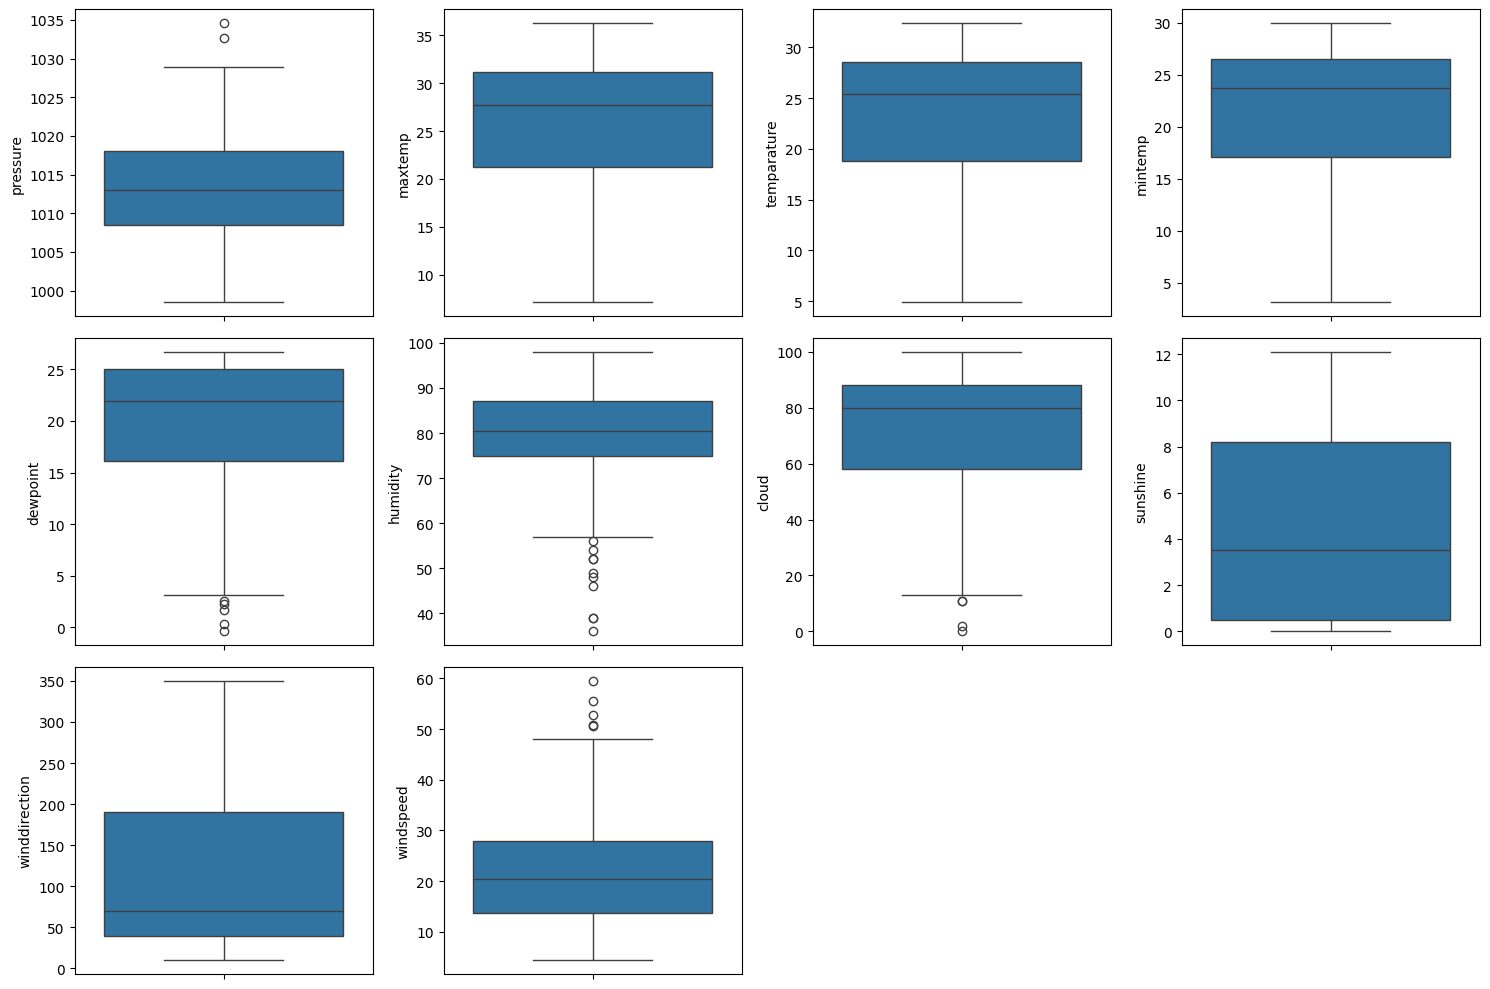

In [31]:
plt.figure(figsize=(15,10))
for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [32]:
df.replace({'yes':1, 'no':0}, inplace=True)

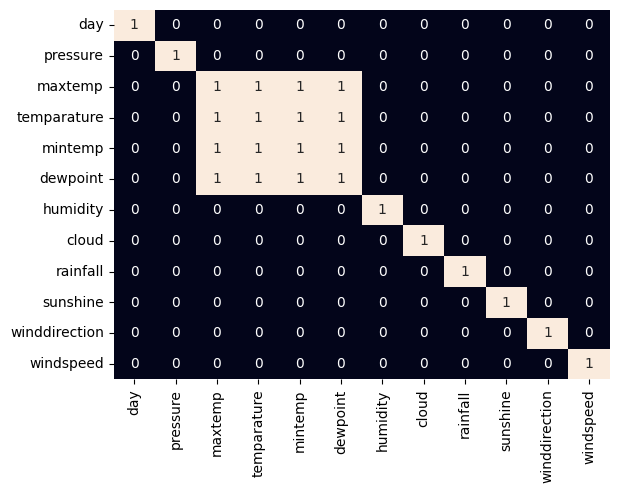

In [33]:
sns.heatmap(df.corr()>0.8, annot=True, cbar=False)
plt.show()

In [34]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [35]:
features=df.drop(['day', 'rainfall'], axis=1)
target=df.rainfall

In [36]:
X_train, X_test, y_train, y_test=train_test_split(features, target, test_size=0.2, random_state=2, stratify=target)
ros=RandomOverSampler(sampling_strategy='minority', random_state=22)
X_train, y_train=ros.fit_resample(X_train, y_train)

In [37]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [43]:
models={
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(kernel='rbf', probability=True),
    'XGBClassifier': XGBClassifier()
}

for name, model in models.items():
  model.fit(X_train, y_train)
  train_pred=model.predict_proba(X_train)
  print(f'{name} Training Accuracy: {metrics.roc_auc_score(y_train, train_pred[:, 1])*100:.2f}%')

  test_pred=model.predict_proba(X_test)
  print(f'{name} Validation Accuracy: {metrics.roc_auc_score(y_test, test_pred[:, 1])*100:.2f}%')
  print()

Logistic Regression Training Accuracy: 88.93%
Logistic Regression Validation Accuracy: 89.67%

SVC Training Accuracy: 90.27%
SVC Validation Accuracy: 88.58%

XGBClassifier Training Accuracy: 100.00%
XGBClassifier Validation Accuracy: 83.92%



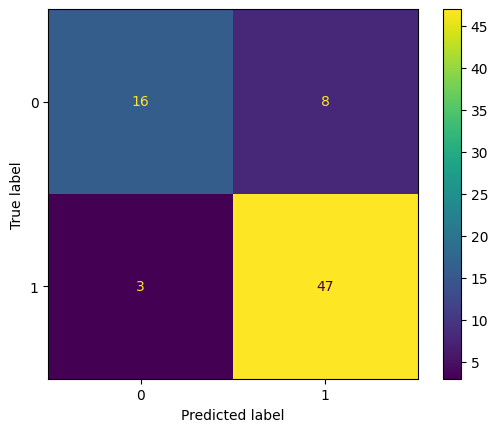

In [44]:
metrics.ConfusionMatrixDisplay.from_estimator(models['SVC'], X_test, y_test)
plt.show()

In [46]:
print(metrics.classification_report(y_test, models['SVC'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74

